In [4]:
# Connect the colab notebook with drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics

In [6]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# The usuals
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Sklearn Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
# Sklearn Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
# Tensorflow modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback
# Model Evaluation
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, plot_roc_curve
import shap
# Show all columns 
pd.set_option('display.max_columns', None)

In [8]:
dataset =  pd.read_csv("/content/drive/MyDrive/Customer_Churn/Cleaned_data_24_10_22.csv")
dataset.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df = dataset[['Geography', 'Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','Exited']].copy()
df.head(5)

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,0,0,42,2,0.00,1,1,1,1
1,2,0,41,1,83807.86,1,0,1,0
2,0,0,42,8,159660.80,3,1,0,1
3,0,0,39,1,0.00,2,0,0,0
4,2,0,43,2,125510.82,1,1,1,0


In [10]:
df.shape

(15682, 9)

In [11]:
X = dataset.drop(['Exited'],axis=1)
y = dataset['Exited']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify=y)

In [13]:
num_cols = X_train.select_dtypes('number').columns
cat_cols = X_train.select_dtypes('object').columns

In [14]:
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])
cat_transformer = Pipeline(steps = [('encoder', OneHotEncoder(handle_unknown = 'ignore', sparse = False))])
preprocessing = ColumnTransformer(transformers = [('num', num_transformer, num_cols),
                                                  ('cat', cat_transformer, cat_cols)])
X_train_trans = preprocessing.fit_transform(X_train)
X_test_trans = preprocessing.transform(X_test)

In [15]:
slice_pipe = preprocessing.named_transformers_['cat']
# cat_features = slice_pipe.named_steps['encoder'].get_feature_names(cat_cols)
X_train_df = pd.DataFrame(X_train_trans, columns = [*num_cols])
X_test_df = pd.DataFrame(X_test_trans, columns = [*num_cols])

In [16]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [17]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier(criterion='gini', max_depth= None, max_features= 8, min_samples_leaf= 5)

# Instantiate the RandomizedSearchCV object: tree_cv
# dt_model = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree.fit(X,y)

# Print the tuned parameters and score
# print("Tuned Decision Tree Parameters: {}".format(dt_model.best_params_))
# print("Best score is {}".format(dt_model.best_score_))

DecisionTreeClassifier(max_features=8, min_samples_leaf=5)

In [18]:
# Predict values using the training data
dt_cv_predict_train = tree.predict(X_train)

# View the accuracy of the model against the training data.  Y_train are the known class values,
# and lr_cv_predict_train are the predicted class values for the same features.
print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train, dt_cv_predict_train)))
print()

Accuracy against training data: 0.9077



In [19]:
# Predict values using the test data
dt_cv_predict_test = tree.predict(X_test)

# View the accuracy of the model against the test data.  Y_test are the known class values,
# and lr_cv_predict_test are the predicted class values for the same features.
print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test, dt_cv_predict_test)))
print()

Accuracy against test data: 0.9148



In [20]:
# View the Confusion Matrix to evaluate the accuracy of the model against the test data.
#
# Returns an array of the form
#		[[True-negative    False-positive]
#		 [False-negative    True-positive]]
#
# A "perfect" classification would have zero values for False-negative and False-positive.
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, dt_cv_predict_test))
print()

Confusion Matrix
[[3601  319]
 [ 349 3572]]



In [21]:
# View the Classification Report showing classification metrics for the model against the test data.
# Two key metrics displayed are Recall and Precision.
#	Recall
#		- The true positive rate.
#		- It is how well the model is predicting a true result when the result is actually true.
#		- Mathematically, recall equals the true positive divided by the sum of the true positive plus the false negative.
#		- Increasing this number means more true positives.
#	Precision
#		- Positive predictor value.
#		- This is how often the real world result was positive when the model said it would be.
#		- Mathematically, precision equals true positive, divided by true positive plus false positive.
#		- Increasing this number means fewer false positives.
print("Classification Report")
print(metrics.classification_report(y_test, dt_cv_predict_test))
print()


Classification Report
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3920
           1       0.92      0.91      0.91      3921

    accuracy                           0.91      7841
   macro avg       0.91      0.91      0.91      7841
weighted avg       0.91      0.91      0.91      7841




In [22]:
# import shap library
! pip install shap
import shap

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(tree)
shap_values = explainer.shap_values(X_train)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


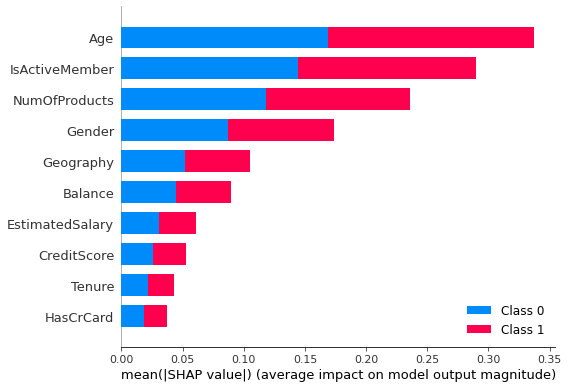

In [23]:
shap.summary_plot(shap_values, X_train)

In [24]:
# Pull feature importances
features_dict = {'Features': X_train.columns, 
                 'Importance': tree.feature_importances_}
# Convert to a dataframe
feature_importance = pd.DataFrame(features_dict, columns = ['Features','Importance'])
# Removing all features with a 0 importance
for i in feature_importance['Importance']:
    if i == 0:
        feature_importance['Importance'].replace(i, np.nan, inplace = True)
        
feature_importance.dropna(inplace = True)
# Sorting the importances
feature_importance.sort_values(by = ['Importance'], ascending = False, inplace = True)

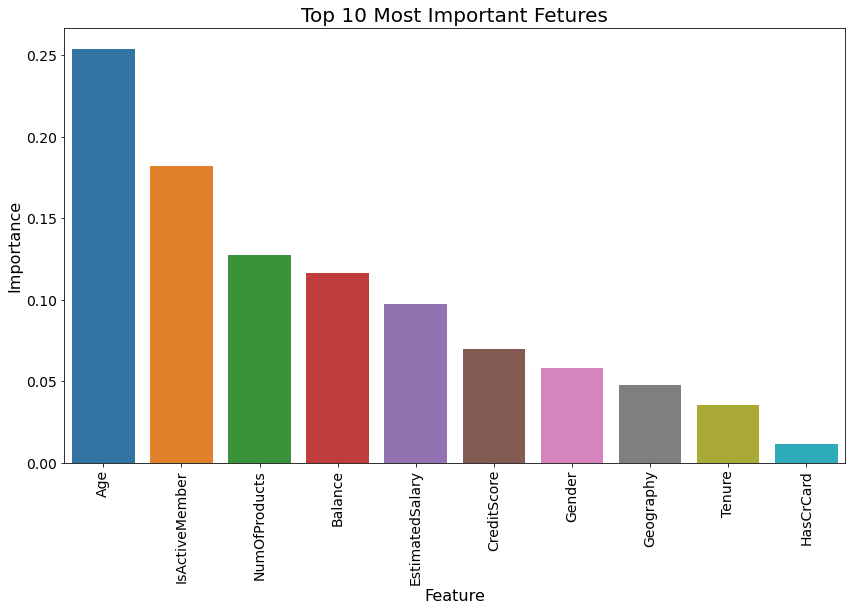

In [25]:
import seaborn as sns
# Let's plot the feature importances
ax = plt.figure(figsize = (14, 8))
ax = sns.barplot(data = feature_importance.head(10), 
                 x = 'Features', y = 'Importance')
ax.set_title('Top 10 Most Important Fetures', fontsize = 20)
ax.set_xlabel('Feature', fontsize = 16)
ax.set_ylabel('Importance', fontsize = 16)
ax.tick_params(labelsize = 14)
plt.xticks(rotation = 90);

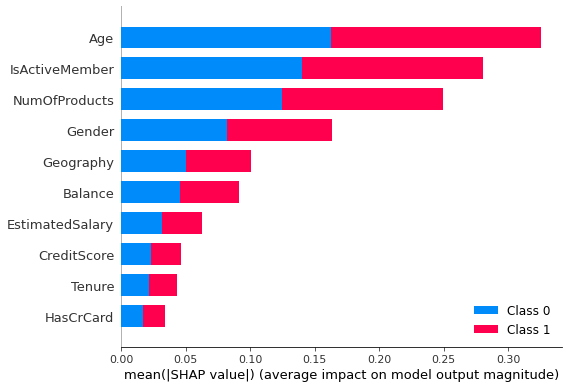

In [26]:
# Setting up SHAP
X_shap = shap.sample(X_train, 100)
explainer = shap.TreeExplainer(tree)
shap_values = explainer.shap_values(X_shap)
# Another shap plot that shows how each feature affects churn
shap.summary_plot(shap_values, X_shap)

In [27]:
explainer = shap.TreeExplainer(tree)
shap_values = explainer.shap_values(X_train)
sv = np.array(shap_values)
y = tree.predict(X_train).astype("bool")
# shap values for survival
sv_survive = sv[:,y,:]
# shap values for dying
sv_die = sv[:,~y,:]

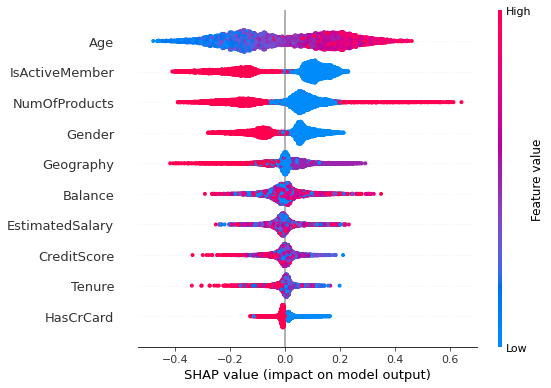

In [28]:
shap.summary_plot(shap_values[1], X_train.astype("float"))
